In [1]:
# Input info
#se_f = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/gff_A2_black/annotation_clones/SE.rds"
# outdir = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/gff_A2_black/annotation_clones/clone_counts/"
# se_cells_meta_f = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/gff_A2_black/annotation_clones/se_cells_meta.tsv"
# sample_names = "Control,Flt3l,Input"
# min_cell = 10


se_cells_meta_f = "/data/Mito_Trace/output/pipeline/v04/CHIP_Input_nameFix_april08_2021/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_pct/clones/variants_init/knn/kparam_30/donor3/cells_meta.tsv"
outdir = "/data/Mito_Trace/output/pipeline/v04/CHIP_Input_nameFix_april08_2021/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_pct/clones/variants_init/knn/kparam_30/annotation_clones/clone_counts/donor3"
sample_names = "Input,Flt3l"
min_cell = 10

In [2]:
sample_names = sample_names.split(",")
sample_names

['Input', 'Flt3l']

In [3]:
def keep_top_clones(df, n_top=None, min_cell=0):
    df = df.sort_values("ncells",ascending=False)
    if n_top is not None:
        df = df[:n_top]
    return df.loc[df["ncells"]>min_cell]

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from os.path import join
%matplotlib inline

In [5]:
se_cells_meta = pd.read_csv(se_cells_meta_f, sep='\t')
se_cells_meta

,Unnamed: 0,orig.ident,nCount_ATAC,nFeature_ATAC,total,duplicate,chimeric,unmapped,lowmapq,mitochondrial,...,seurat_clusters,nCount_RNA,nFeature_RNA,ID,Row.names,lineage,donor,condition,name,cluster_labels
0,Input_AAACGAATCCGGGCAT-1,Input,3882,3882,41493.0,5928,189,120,951,26859,...,1,5379,3948,AAACGAATCCGGGCAT-1_Input,Input_AAACGAATCCGGGCAT-1,32,3,Input,3_32,1
1,Input_AAAGATGTCTAAACGC-1,Input,5576,5576,49283.0,8604,314,122,1940,28464,...,1,6479,4783,AAAGATGTCTAAACGC-1_Input,Input_AAAGATGTCTAAACGC-1,66,3,Input,3_66,1
2,Input_AAAGGATAGCGTTGCC-1,Input,3384,3384,31716.0,4965,183,59,1236,18717,...,2,4278,3449,AAAGGATAGCGTTGCC-1_Input,Input_AAAGGATAGCGTTGCC-1,19,3,Input,3_19,2
3,Input_AACAAAGAGACTCTTG-1,Input,4722,4722,45558.0,7925,283,88,1654,27118,...,4,5805,4285,AACAAAGAGACTCTTG-1_Input,Input_AACAAAGAGACTCTTG-1,26,3,Input,3_26,4
4,Input_AACAAAGGTGATTCCA-1,Input,4499,4499,43167.0,6770,196,88,1268,27231,...,4,5572,4194,AACAAAGGTGATTCCA-1_Input,Input_AACAAAGGTGATTCCA-1,18,3,Input,3_18,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Flt3l_GAATCTGTCTTCTTCC-1,Flt3l,10520,10520,200456.0,57240,1152,670,8347,114446,...,9,14570,8135,GAATCTGTCTTCTTCC-1_Flt3l,Flt3l_GAATCTGTCTTCTTCC-1,26,3,Flt3l,3_26,9
196,Flt3l_TAAGCCAAGTGAAGGA-1,Flt3l,8787,8787,172056.0,61329,1198,664,12978,76023,...,13,13553,7189,TAAGCCAAGTGAAGGA-1_Flt3l,Flt3l_TAAGCCAAGTGAAGGA-1,39,3,Flt3l,3_39,13
197,Flt3l_TAGCTTTTCGGACGAA-1,Flt3l,9437,9437,204481.0,57033,1150,902,7697,119545,...,9,14367,7939,TAGCTTTTCGGACGAA-1_Flt3l,Flt3l_TAGCTTTTCGGACGAA-1,44,3,Flt3l,3_44,9
198,Flt3l_TAGTCCCCAAGCCTTA-1,Flt3l,9296,9296,145841.0,50960,877,660,6763,70157,...,9,12583,7308,TAGTCCCCAAGCCTTA-1_Flt3l,Flt3l_TAGTCCCCAAGCCTTA-1,36,3,Flt3l,3_36,9


In [6]:
group_counts = se_cells_meta.groupby(["condition", "donor"]).size()
group_counts

condition  donor
Flt3l      3          5
Input      3        195
dtype: int64

### Remove None before normalizing

In [11]:
def plots(df, name, scatter_hue_col=None):
    f, ax =plt.subplots(figsize=(12,12))
    if df.shape[0] > 0:
        df[["ncells"]].plot.bar(ax=ax)
    else:
        f = plt.figure()
        plt.savefig(join(outdir, name+".barplot_conditions.svg"))
        plt.savefig(join(outdir, name+".barplot_conditions.png"))
        plt.savefig(join(outdir, name+".barplot.svg"))
        plt.savefig(join(outdir, name+".conditionScatter.svg"))
        plt.savefig(join(outdir, name+".conditionScatter.png"))
        return
    
    plt.savefig(join(outdir, name+".barplot.png"))
    plt.savefig(join(outdir, name+".barplot.svg"))
    
    f, ax =plt.subplots(figsize=(12,12))
    df.drop(["ncells", "donor"],axis=1).plot.bar(stacked=True, ax=ax)
    plt.savefig(join(outdir, name+".barplot_conditions.png"))
    plt.savefig(join(outdir, name+".barplot_conditions.svg"))
    
    
    cultured_inds = set(df.columns.values) - {"Input", "ncells","donor"}
    df["cultured"] = df[cultured_inds].sum(axis=1)
    
    # Save this figure even if empty
    f, ax =plt.subplots(figsize=(12,12))
    if "Input" in df.columns and len(sample_names)>1:
        sns.scatterplot(data=df, x="Input", y="cultured", hue=scatter_hue_col, ax=ax)
        ax.set_box_aspect(1)
    plt.savefig(join(outdir, name+".conditionScatter.png"))
    plt.savefig(join(outdir, name+".conditionScatter.svg"))

    # Only save this figure if data there
    if len(sample_names) > 1:
        f, ax =plt.subplots(figsize=(12,12))
        sns.scatterplot(data=df, x=sample_names[0], y=sample_names[1], hue=scatter_hue_col, ax=ax)
        ax.set_box_aspect(1)
        plt.savefig(join(outdir, name+".conditionScatter_comp02.png"))
        plt.savefig(join(outdir, name+".conditionScatter_comp02.svg"))    

    return

In [8]:
clone_counts = se_cells_meta.groupby(["name", "condition","donor"]).size().reset_index().rename({0:"ncells"}, axis=1)
clone_counts = clone_counts[~(clone_counts["name"]=="None")]
clone_counts_combined = clone_counts.groupby(["name", "donor"]).sum()["ncells"].reset_index().sort_values("ncells", ascending=False).set_index("name")
def get_clone_count(x):
    curr = clone_counts[clone_counts["name"]==x.name]
    return curr.set_index("condition")["ncells"]

clone_counts_df = pd.concat((clone_counts_combined, clone_counts_combined.apply(get_clone_count, axis=1)),axis=1).fillna(0)
clone_counts_df

clone_counts_filt_10_df = clone_counts_df.loc[clone_counts_df["ncells"]>=min_cell]
# if clone_counts_filt_10_df.shape[0] == 0:
#     clone_counts_filt_10_df = clone_counts_df.loc[clone_counts_df["ncells"]>=2]

In [9]:
clone_counts_filt_10_df

,donor,ncells,Flt3l,Input
name,,,,
3_9,3,9,0.0,9.0
3_11,3,8,0.0,8.0
3_10,3,8,0.0,8.0
3_12,3,8,0.0,8.0
3_13,3,7,0.0,7.0
3_17,3,6,0.0,6.0
3_14,3,6,0.0,6.0
3_15,3,6,0.0,6.0
3_68,3,5,0.0,5.0


FileNotFoundError: [Errno 2] No such file or directory: '/data/Mito_Trace/output/pipeline/v04/CHIP_Input_nameFix_april08_2021/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_pct/clones/variants_init/knn/kparam_30/annotation_clones/clone_counts/donor3/clone_counts.barplot.png'

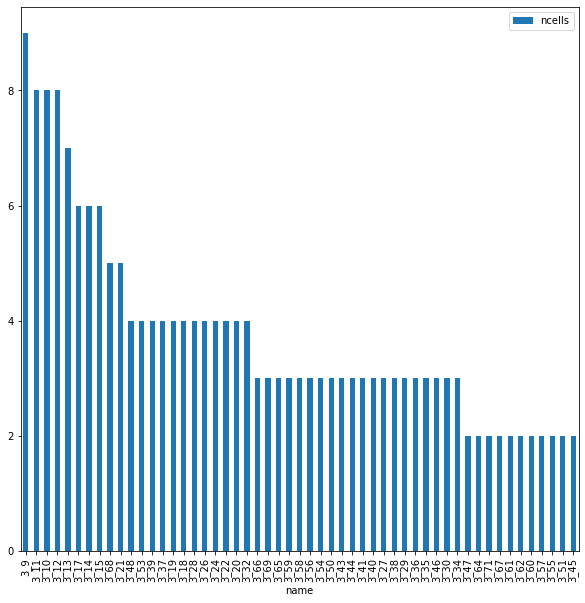

In [10]:
%matplotlib inline
plots(clone_counts_filt_10_df,
      name="clone_counts")

# Normalize

In [ ]:
clone_norm = clone_counts.copy()
clone_norm["ncells"] = clone_norm.apply(lambda x: x["ncells"]/group_counts.loc[(x["condition"], x["donor"])] , axis=1)

print("sum of normed values", clone_norm.groupby(["condition", "donor"]).sum()["ncells"])

#clone_norm = se_cells_meta.groupby(["name", "condition","donor"]).size().reset_index().rename({0:"ncells"}, axis=1)
clone_norm = clone_norm[~(clone_norm["name"]=="None")]
clone_norm_combined = clone_norm.groupby(["name", "donor"]).sum()["ncells"].reset_index().sort_values("ncells", ascending=False).set_index("name")
def get_clone_count(x):
    curr = clone_norm[clone_norm["name"]==x.name]
    return curr.set_index("condition")["ncells"]

clone_norm_df = pd.concat((clone_norm_combined, clone_norm_combined.apply(get_clone_count, axis=1)),axis=1).fillna(0)
clone_norm_df




In [ ]:
plots(clone_norm_df,
      name="normalized_counts")

## Only top clones

In [ ]:
cell_25 = keep_top_clones(clone_counts_filt_10_df, min_cell=min_cell).index

In [ ]:
if "cultured" in clone_counts_filt_10_df.columns:
    clone_counts_filt_10_df = clone_counts_filt_10_df.drop("cultured",axis=1)
plots(keep_top_clones(clone_counts_filt_10_df, n_top=20, min_cell=min_cell),
      name=f"top20_minCell{min_cell}_clone_counts")

plots(keep_top_clones(clone_counts_filt_10_df, n_top=20, min_cell=2),
      name=f"top20_minCell{min_cell}_clone_counts")

In [ ]:
if "cultured" in clone_norm_df.columns:
    clone_norm_df = clone_norm_df.drop("cultured", axis=1)
plots(keep_top_clones(clone_norm_df.loc[cell_25], n_top=20, min_cell=0),
     name=f"top20_minCell{min_cell}_clone_normalized_counts")

In [ ]:
outdir

## Split by donors

In [ ]:
for d, curr_df in clone_counts_filt_10_df.groupby("donor"):
    print(d)
    if "cultured" in curr_df.columns:
        curr_df = curr_df.drop("cultured", axis=1)
    plots(curr_df, name=f"donor{d}.clone_counts")
    plots(keep_top_clones(curr_df, n_top=20, min_cell=min_cell),
      name=f"donor{d}.top20_minCell{min_cell}_clone_counts")